In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\AT\Desktop\Data Science Projects\AssociationRuleMining_BasketMarketAnalysis\Groceries_dataset.csv")
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

In [5]:
data['itemDescription'].value_counts()

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

# Data Analysis

## 1. Top 10 Products Selling

In [6]:
# Group the data by 'itemDescription' and count the frequency of each item
# This step is crucial for understanding how often each item appears in the dataset
# The result is sorted by the 'Frequency' column in descending order to see the most common items at the top
Item_distr = data.groupby(by="itemDescription").size().reset_index(name='Frequency').sort_values(by="Frequency", ascending=False).head(10)

# Prepare the data for visualization
# 'bars' holds the names of the items (item descriptions)
# 'height' contains the frequency of each item, which is the height of the bars in the plot
# 'x_pos' is an array of positions on the x-axis, corresponding to the items; it's used to correctly place each bar on the plot
bars = Item_distr['itemDescription']
height = Item_distr['Frequency']
x_pos = np.arange(len(bars))


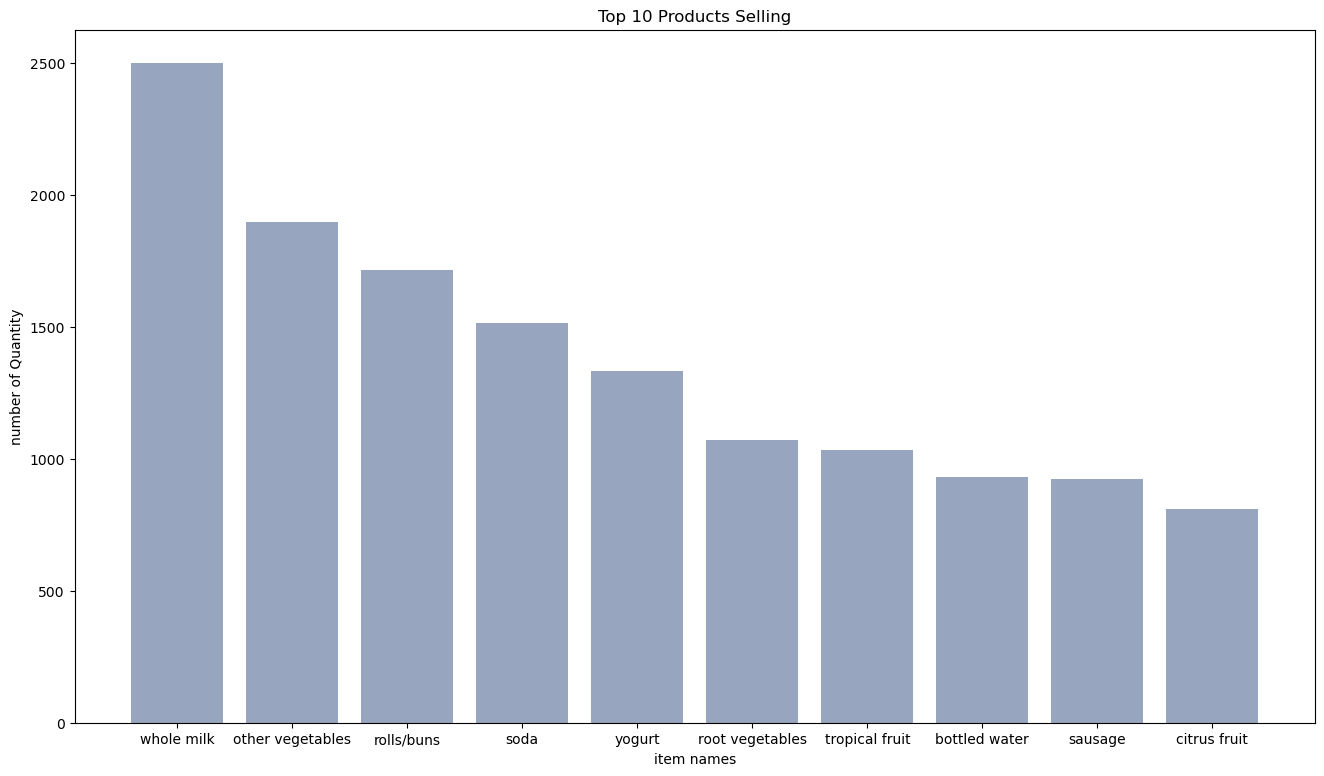

In [7]:
plt.figure(figsize=(16, 9))
plt.bar(x_pos, height, color=(0.2, 0.3, 0.5, 0.5))

plt.title("Top 10 Products Selling")
plt.xlabel("item names")
plt.ylabel("number of Quantity")

plt.xticks(x_pos, bars)

plt.show()

here we can see the top selling product is `whole milk` with about 2500 Sell

## 2. Selling Products Over Months

In [8]:
# Set 'date' as the index  
df_date = data
df_date = data.set_index('Date', drop=True)

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

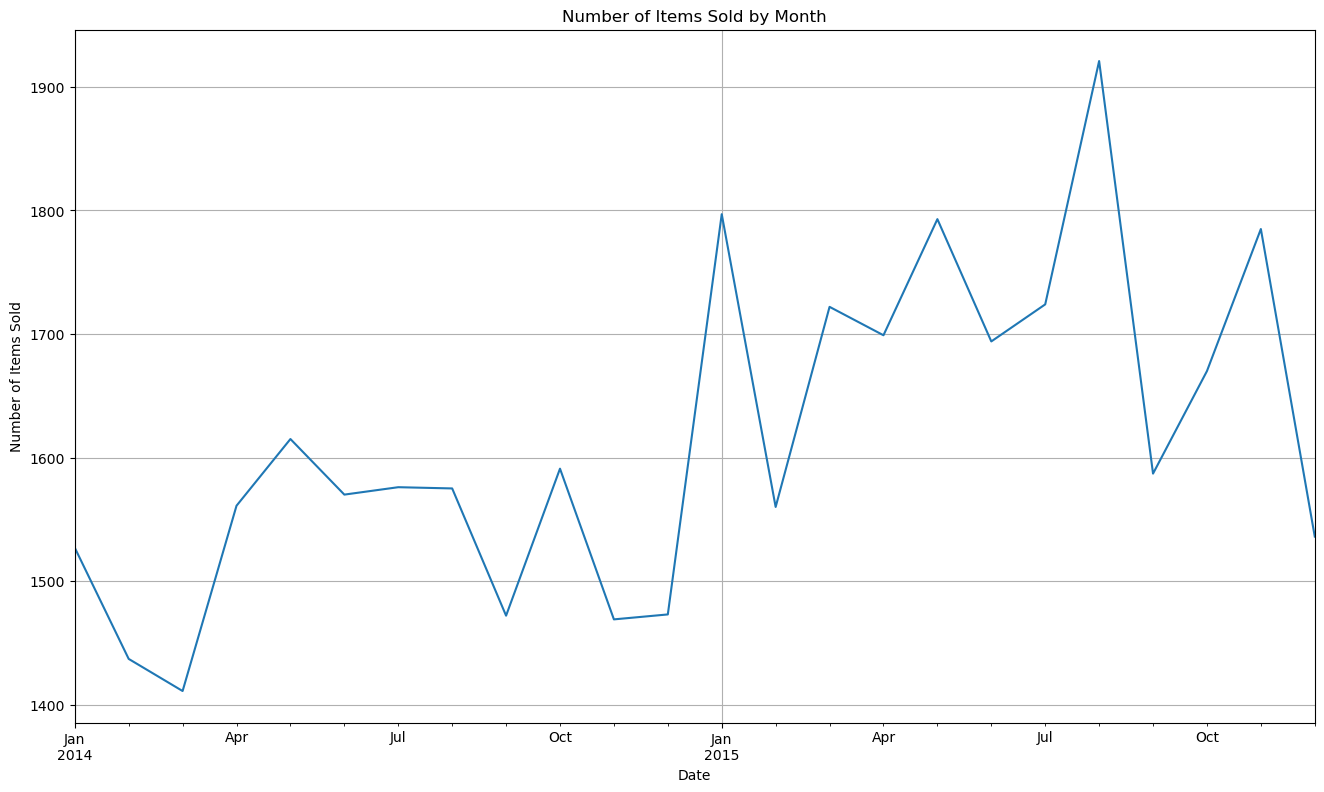

In [9]:
df_date.resample('M')["itemDescription"].count().plot(figsize=(16, 9), grid=True, title="Number of Items Sold by Month").set(xlabel="Date", ylabel="Number of Items Sold")

In [10]:
Cust_level = data[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending=False)
Cust_level["itemDescription"] = Cust_level["itemDescription"].str.strip()
Cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


# Machine Learning Baseline

In [11]:
transactions = [a[1]['itemDescription'].tolist() for a in list (Cust_level.groupby(["Member_number"]))]

In [12]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.002,min_confidence = 0.05, min_lift =3, min_length = 2)

In [13]:
results = list(rules)

In [14]:
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [17]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsindataframe = pd.DataFrame(inspect (results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidences', 'Lift'])

In [18]:
resultsindataframe.nlargest(n=10, columns="Lift")

,Left Hand Side,Right Hand Side,Support,Confidences,Lift
4915,berries,yogurt,0.002052,0.105263,14.654135
4914,berries,pork,0.002052,0.105263,12.068111
2674,beef,pork,0.002052,0.242424,11.524021
3573,brown bread,yogurt,0.002052,0.073394,11.443670
4133,citrus fruit,meat,0.002052,0.148148,11.105413
3290,oil,citrus fruit,0.002052,0.150943,10.322410
2904,brown bread,misc. beverages,0.002309,0.097826,9.533152
5045,meat,pastry,0.002052,0.135593,9.438257
2902,brown bread,domestic eggs,0.002052,0.086957,9.415459
2734,berries,brown bread,0.002309,0.118421,9.232105
